In [1]:

import os
import pickle
import numpy as np
from utils.tokenize import tokenize, create_dict, sent_to_ix, cmumosei_2, cmumosei_7, pad_feature

/home/xinnan/.local/lib/python3.6/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_vectors_web_lg' (2.1.0) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
import en_vectors_web_lg

In [3]:
dataroot = 'data'
name = 'train'

word_file = os.path.join(dataroot, "L_" + name + ".pkl")
video_file = os.path.join(dataroot, "V_" + name + "_r21d.pkl")
y_s_file = os.path.join(dataroot, "Y_S_" + name + ".pkl")
y_e_file = os.path.join(dataroot, "Y_E_" + name + ".pkl")

key_to_word = pickle.load(open(word_file, "rb"))
key_to_video = pickle.load(open(video_file, "rb"))
key_to_emotion = pickle.load(open(y_e_file, "rb"))
key_to_sentiment = pickle.load(open(y_s_file, "rb"))

In [4]:
print(key_to_video['GTGtVdAuyRc[1]'].shape)
print(key_to_word['GTGtVdAuyRc[1]'].shape)

(30, 512)
(34, 1)


In [6]:
key_to_sentiment['GTGtVdAuyRc[2]']

array([0.33333334], dtype=float32)

In [7]:
key_to_sentence = tokenize(key_to_word)

In [16]:
to_write = {}
for key in key_to_sentence:
    sentence = []
    for word in key_to_sentence[key]:
        if word == 'sp':
            pass
        else:
            sentence.append(word)
    to_write[key] = ' '.join(sentence)

In [19]:
import json
str_to_write = json.dumps(to_write)

In [21]:
with open('sentences.json', 'w') as f:
    f.write(str_to_write)

In [34]:
spacy_tool = en_vectors_web_lg.load()

/home/xinnan/.local/lib/python3.6/site-packages/spacy/_ml.py:287: UserWarning: [W020] Unnamed vectors. This won't allow multiple vectors models to be loaded. (Shape: (1070971, 300))
  warnings.warn(Warnings.W020.format(shape=vectors.data.shape))


In [44]:
avg_glove_vector = {}

for key in key_to_sentence:
    embeddings = []
    for word in key_to_sentence[key]:
        embeddings.append(spacy_tool(word).vector)

    avg_glove_vector[key] = np.array(embeddings).mean(axis=0)

In [22]:
with open('embeddings.json', 'r') as f:
    bert_embd = json.loads(f.read())

In [23]:
sentiment_labels = []
bert_vectors = []

for key in bert_embd:
    sentiment_score = key_to_sentiment[key][0]
    if sentiment_score > 0:
        sentiment_labels.append('#91cf60')
    elif sentiment_score < 0:
        sentiment_labels.append('#fc8d59')
    else:
        sentiment_labels.append('grey')
    
    bert_vectors.append(np.array(bert_embd[key]))

bert_vectors = np.array(bert_vectors)
sentiment_labels = np.array(sentiment_labels)

In [78]:
sentiment_labels = []
glove_vectors = []

for key in avg_glove_vector:
    sentiment_score = key_to_sentiment[key][0]
    if sentiment_score > 0:
        sentiment_labels.append('#91cf60')
    elif sentiment_score < 0:
        sentiment_labels.append('#fc8d59')
    else:
        sentiment_labels.append('grey')
    
    glove_vectors.append(avg_glove_vector[key])

glove_vectors = np.array(glove_vectors)
sentiment_labels = np.array(sentiment_labels)

In [62]:
!pip3 install matplotlib

    100% |████████████████████████████████| 11.6MB 181kB/s eta 0:00:01    95% |██████████████████████████████▍ | 11.0MB 4.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/bf/92385b4262178ca22b34f82e0e09c2922eb351fe39f3cc7b8ba9ea555b41/Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b8/e5/a64ef44a85397ba3c377f6be9c02f3cb3e18023f8c89850dd319e7945521/numpy-1.19.2-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 92kB 11.7MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2

In [24]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt

In [64]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(glove_vectors)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 16327 samples in 0.474s...
[t-SNE] Computed neighbors for 16327 samples in 137.713s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16327
[t-SNE] Computed conditional probabilities for sample 2000 / 16327
[t-SNE] Computed conditional probabilities for sample 3000 / 16327
[t-SNE] Computed conditional probabilities for sample 4000 / 16327
[t-SNE] Computed conditional probabilities for sample 5000 / 16327
[t-SNE] Computed conditional probabilities for sample 6000 / 16327
[t-SNE] Computed conditional probabilities for sample 7000 / 16327
[t-SNE] Computed conditional probabilities for sample 8000 / 16327
[t-SNE] Computed conditional probabilities for sample 9000 / 16327
[t-SNE] Computed conditional probabilities for sample 10000 / 16327
[t-SNE] Computed conditional probabilities for sample 11000 / 16327
[t-SNE] Computed conditional probabilities for sample 12000 / 16327
[t-SNE] Computed conditional probabilities for 

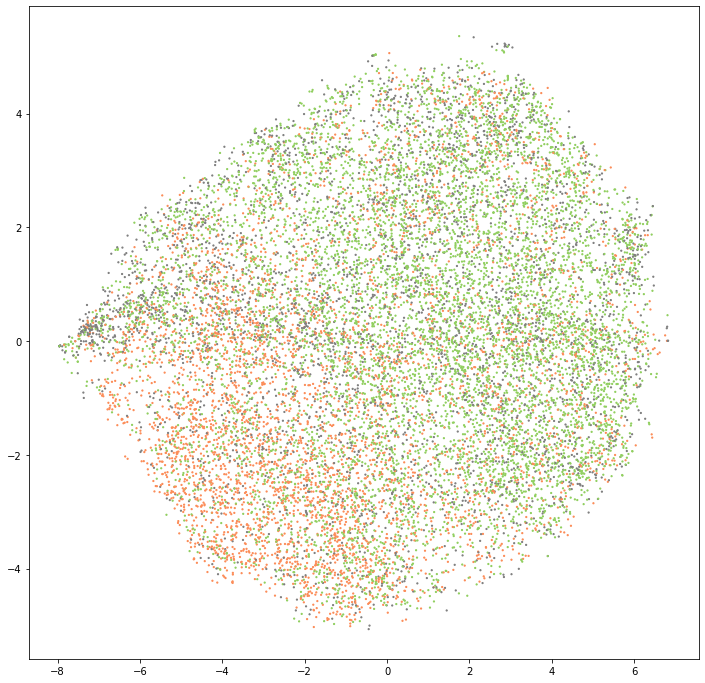

In [81]:
plt.figure(figsize=(12,12))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=sentiment_labels, s=1.5)

In [1]:
import tensorflow as tf

In [25]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(bert_vectors)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 16327 samples in 1.538s...
[t-SNE] Computed neighbors for 16327 samples in 312.744s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16327
[t-SNE] Computed conditional probabilities for sample 2000 / 16327
[t-SNE] Computed conditional probabilities for sample 3000 / 16327
[t-SNE] Computed conditional probabilities for sample 4000 / 16327
[t-SNE] Computed conditional probabilities for sample 5000 / 16327
[t-SNE] Computed conditional probabilities for sample 6000 / 16327
[t-SNE] Computed conditional probabilities for sample 7000 / 16327
[t-SNE] Computed conditional probabilities for sample 8000 / 16327
[t-SNE] Computed conditional probabilities for sample 9000 / 16327
[t-SNE] Computed conditional probabilities for sample 10000 / 16327
[t-SNE] Computed conditional probabilities for sample 11000 / 16327
[t-SNE] Computed conditional probabilities for sample 12000 / 16327
[t-SNE] Computed conditional probabilities for 

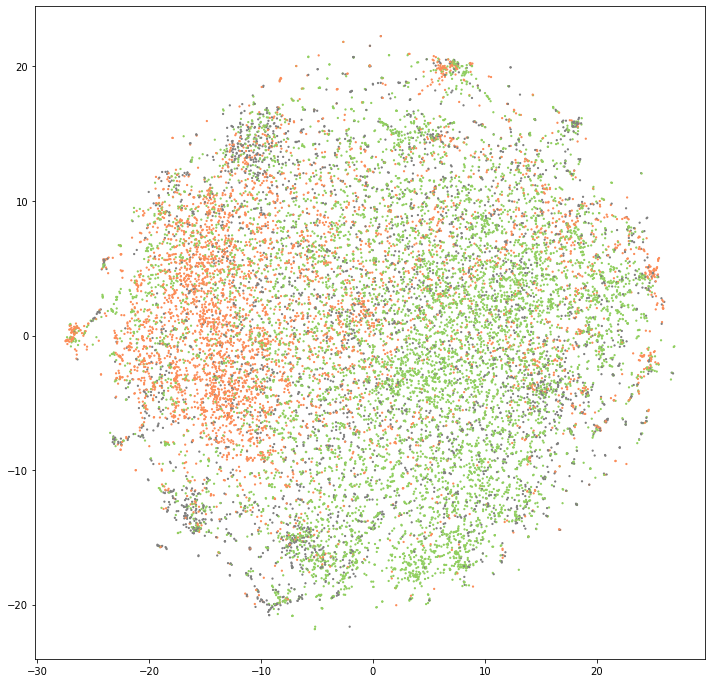

In [26]:
# bert p 40 300 iteration
plt.figure(figsize=(12,12))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=sentiment_labels, s=1.5)

In [29]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(bert_vectors)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 16327 samples in 1.525s...
[t-SNE] Computed neighbors for 16327 samples in 322.842s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16327
[t-SNE] Computed conditional probabilities for sample 2000 / 16327
[t-SNE] Computed conditional probabilities for sample 3000 / 16327
[t-SNE] Computed conditional probabilities for sample 4000 / 16327
[t-SNE] Computed conditional probabilities for sample 5000 / 16327
[t-SNE] Computed conditional probabilities for sample 6000 / 16327
[t-SNE] Computed conditional probabilities for sample 7000 / 16327
[t-SNE] Computed conditional probabilities for sample 8000 / 16327
[t-SNE] Computed conditional probabilities for sample 9000 / 16327
[t-SNE] Computed conditional probabilities for sample 10000 / 16327
[t-SNE] Computed conditional probabilities for sample 11000 / 16327
[t-SNE] Computed conditional probabilities for sample 12000 / 16327
[t-SNE] Computed conditional probabilities for 

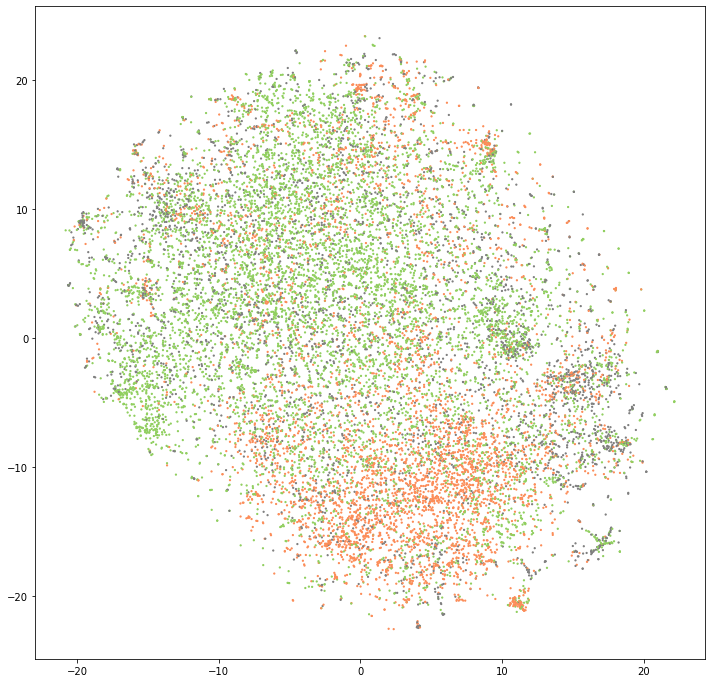

In [30]:
# bert p 60 300 iteration
plt.figure(figsize=(12,12))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=sentiment_labels, s=1.5)